# Predicting Multiple Sclerosis from Dynamics of Gait Variability - A Deep Learning Approach
### Traditional ML algorithms on subject generalization framework to classify HOA/MS sequences of strides and subjects 

1. We use the raw, size-N and regress-N data for this analysis.
2. Save the optimal hyperparameters, confusion matrices and ROC curves for each algorithm.
3. Make sure to shuffle the sample and normalize (z-score normalization) the features before we feed them to the model.
4. We use the summary statistics mean and standard deviation as the features to input to the traditional models requiring fixed size 1D input for each training/testing set sample.

In [1]:
from importlib import reload
import utils.utils_traditional_methods
reload(utils.utils_traditional_methods)
from utils.utils_traditional_methods import extract_data_subject_generalize, models_subject_generalize, plot_ROC_subject_generalize, run_ml_models
from utils.package_imports import *

### Reading, shuffling and normalizing the raw, size-N and regress-N summary statistics data

In [2]:
#Raw data 
print ('raw data')
X_raw, Y_raw = extract_data_subject_generalize("data/summary_statistics_raw_data_5strides.csv")

#Size-N data
print ('\nsize-N data')
X_sizeN, Y_sizeN = extract_data_subject_generalize("data/summary_statistics_sizeN_data_5strides.csv")

#Regress-N data
print ('\nregress-N data')
X_regressN, Y_regressN = extract_data_subject_generalize("data/summary_statistics_regressN_data_5strides.csv")

results_dir = '5strides/' #Depends on how many strides per sequence were selected for computing summary statistics

raw data
X shape:  (1436, 42)


,LeftFPA_mean,RightFPA_mean,Butterfly_x_abs_mean,ButterflySQ_x_mean,DS_R_mean,SS_R_mean,DS_L_mean,force_HSR_mean,force_MidSSR_mean,force_TOR_mean,...,force_TOL_std,force_MidSSL_std,stride_time_std,swing_time_std,stance_time_std,stride_length_std,stride_width_std,stride_speed_std,cadence_std,walk_ratio_std
651,0.414719,-1.683845,0.006779,0.000068,0.3584,0.2744,0.4708,1251.067541,1177.316170,1223.798380,...,42.745414,34.858251,0.067492,0.021194,0.078682,0.066567,0.024912,0.039223,4.570305,0.001818
411,-0.139211,0.118360,0.012464,0.000383,0.1876,0.3804,0.1836,673.014737,615.068997,736.517318,...,24.315068,16.593731,0.038226,0.012116,0.032199,0.033665,0.013933,0.032779,3.464875,0.001223
342,0.104718,-0.003506,0.019919,0.000338,0.1252,0.3344,0.1272,547.560404,398.168792,575.769403,...,15.147965,9.577234,0.004382,0.004472,0.005933,0.009625,0.009827,0.015424,0.616316,0.000141
1298,-0.053151,0.043466,0.020581,0.000766,0.2180,0.4288,0.2360,667.168901,642.300182,682.998124,...,19.692158,16.075438,0.008173,0.016087,0.016649,0.032577,0.011784,0.026770,0.549070,0.000696
483,-0.191019,0.060543,0.035246,0.000451,0.1636,0.4412,0.1632,630.732183,603.345659,632.355508,...,14.345820,24.976109,0.098525,0.036183,0.064172,0.033812,0.031015,0.090123,8.642970,0.002228


Y shape:  (1436, 2)

size-N data
X shape:  (1436, 42)


,stride_length_mean,stride_width_mean,DS_R_mean,SS_R_mean,DS_L_mean,stride_time_mean,stance_time_mean,swing_time_mean,force_HSR_mean,force_MidSSR_mean,...,force_HSL_std,force_TOL_std,force_MidSSL_std,cadence_std,stride_speed_std,walk_ratio_std,LeftFPA_std,RightFPA_std,Butterfly_x_abs_std,ButterflySQ_x_std
651,0.212564,0.163735,0.854144,0.653954,1.122018,3.262144,2.630116,0.632029,1.045326,0.983704,...,0.040932,0.035716,0.029126,0.031962,0.009529,0.150534,1.234258,9.246465,0.068692,0.001450
411,0.683355,0.119288,0.443839,0.899982,0.434376,2.690481,1.778197,0.912284,0.943672,0.862423,...,0.064929,0.034094,0.023267,0.024409,0.007905,0.099043,2.372028,2.632391,0.030813,0.000918
342,0.888877,0.073060,0.301725,0.805885,0.306545,2.228716,1.414155,0.814561,1.011169,0.735291,...,0.104914,0.027973,0.017686,0.004262,0.003789,0.012086,1.664282,1.385572,0.007908,0.000154
1298,0.760590,0.048751,0.517626,1.018157,0.560366,3.177941,2.096149,1.081792,0.968790,0.932678,...,0.021733,0.028595,0.023343,0.003854,0.006479,0.056977,1.610343,0.584382,0.021489,0.000210
483,0.796918,0.107345,0.405096,1.092471,0.404105,2.949573,1.901673,1.047901,0.949702,0.908466,...,0.063022,0.021601,0.037607,0.058175,0.022748,0.206871,2.234866,1.945652,0.036808,0.001142


Y shape:  (1436, 2)

regress-N data
X shape:  (1436, 42)


,ButterflySQ_x_mean,Butterfly_x_abs_mean,DS_L_mean,DS_R_mean,LeftFPA_mean,RightFPA_mean,SS_R_mean,cadence_mean,force_HSL_mean,force_HSR_mean,...,force_MidSSR_std,force_TOL_std,force_TOR_std,stance_time_std,stride_length_std,stride_speed_std,stride_time_std,stride_width_std,swing_time_std,walk_ratio_std
651,4.144122,7.052191,2.238617,1.759346,0.345478,-1.586368,0.712733,0.858601,1.004155,0.973706,...,0.014605,0.034511,0.020771,0.096884,0.059059,0.040646,0.057045,0.114004,0.057576,0.084144
411,3.398266,1.565104,0.864612,0.913773,-0.402824,0.548152,0.996325,1.039766,0.777990,0.891392,...,0.035964,0.033113,0.009434,0.041183,0.028998,0.032263,0.032096,0.112465,0.030436,0.054584
342,0.451601,0.467368,0.613761,0.621876,0.536454,-0.210394,0.875844,1.254634,1.081738,0.965817,...,0.054681,0.026480,0.013966,0.007588,0.008290,0.015181,0.003741,0.098931,0.011454,0.006302
1298,0.671041,1.574216,1.116700,1.065944,0.247690,-0.259387,1.123092,0.879531,0.878090,0.916255,...,0.025024,0.027691,0.021829,0.021294,0.028062,0.026348,0.006885,0.133049,0.040566,0.031062
483,5.335893,3.874526,0.815647,0.835771,-1.210425,0.952603,1.155569,0.955579,0.905973,0.899402,...,0.059115,0.020853,0.026985,0.082075,0.029125,0.088703,0.086127,0.286329,0.095282,0.099448


Y shape:  (1436, 2)


### Traditional ML models for raw summary features 

In [3]:
data_type = 'raw_data'
ml_models = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'mlp', 'decision_tree',  'linear_svm', 
             'logistic_regression']

random_forest
best_params:  {'randomforestclassifier__class_weight': None, 'randomforestclassifier__max_depth': 25, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 40}
Stride-based model performance (mean):  [0.5632691626273685, 0.5257966240202592, 0.5345003176576127, 0.4703245312651571, 0.6199220279782074]
Stride-based model performance (standard deviation):  [0.16773911679554876, 0.23364070605774828, 0.23587046203007722, 0.1586850722086979, 0.19835638671644837]
Person-based model performance (mean):  [0.5714285714285714, 0.5266666666666666, 0.65, 0.5071428571428571, 0.74]
Person-based model performance (standard deviation):  [0.18070158058105026, 0.27357712704910925, 0.30000000000000004, 0.18095238095238092, 0.22449944320643647]


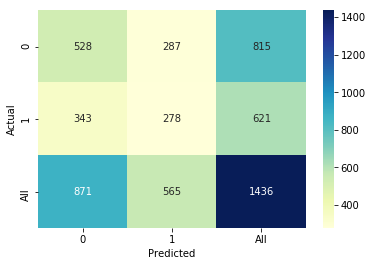

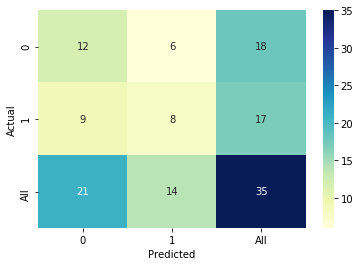

********************************
adaboost
best_params:  {'adaboostclassifier__learning_rate': 1.5, 'adaboostclassifier__n_estimators': 50}
Stride-based model performance (mean):  [0.5344933119106331, 0.4973848856457551, 0.5501695744892191, 0.47109953212930555, 0.591937423474486]
Stride-based model performance (standard deviation):  [0.09814021866838543, 0.24268991673557977, 0.0956522588028534, 0.14007361188334322, 0.10771380516221522]
Person-based model performance (mean):  [0.5428571428571428, 0.5733333333333334, 0.5566666666666666, 0.5349206349206349, 0.6366666666666667]
Person-based model performance (standard deviation):  [0.20995626366712955, 0.14204850501775013, 0.2973213749463701, 0.22208612612562162, 0.16138291249213607]


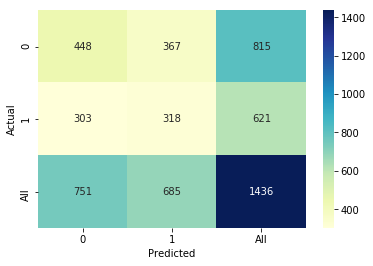

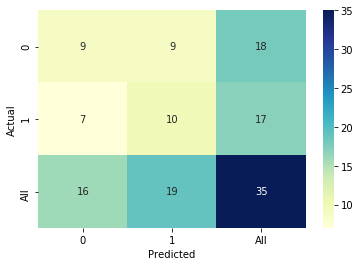

********************************
kernel_svm
best_params:  {'svc__gamma': 10}
Stride-based model performance (mean):  [0.568039160095795, 0.0, 0.0, 0.0, 0.5022883597883597]
Stride-based model performance (standard deviation):  [0.22221119967015965, 0.0, 0.0, 0.0, 0.013912778647810655]
Person-based model performance (mean):  [0.5142857142857142, 0.0, 0.0, 0.0, 0.5]
Person-based model performance (standard deviation):  [0.19378085666072195, 0.0, 0.0, 0.0, 0.0]


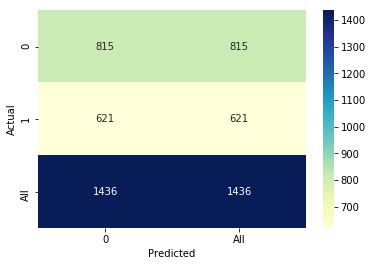

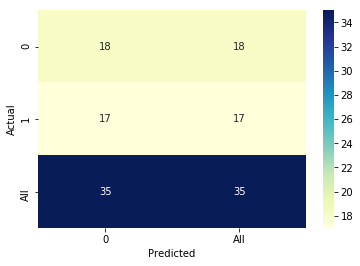

********************************
gbm
best_params:  {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 7, 'gradientboostingclassifier__max_features': 'sqrt', 'gradientboostingclassifier__min_samples_leaf': 3, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 100}
Stride-based model performance (mean):  [0.5772054416003363, 0.5568836178910083, 0.535813139210189, 0.4809523646417385, 0.652384917309212]
Stride-based model performance (standard deviation):  [0.17594314174738096, 0.26513319437901944, 0.23894642434501104, 0.17081025710224526, 0.20585642622009526]
Person-based model performance (mean):  [0.6285714285714286, 0.6333333333333333, 0.65, 0.5949206349206348, 0.77]
Person-based model performance (standard deviation):  [0.23211538298959886, 0.2716206504995115, 0.30000000000000004, 0.2439913343276956, 0.22715633383201095]


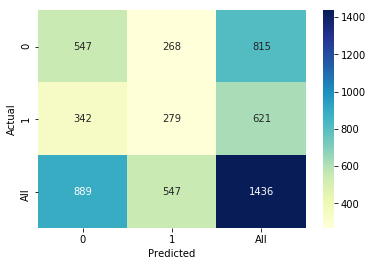

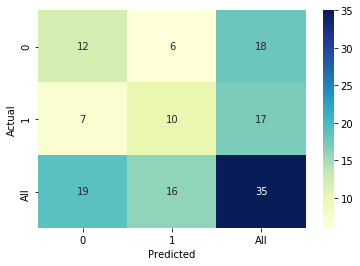

********************************
xgboost
best_params:  {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__gamma': 0.5, 'xgbclassifier__max_depth': 8, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__subsample': 1.0}
Stride-based model performance (mean):  [0.5833594905163736, 0.5602694895841408, 0.5282187365326964, 0.48678637137848757, 0.6418463991421048]
Stride-based model performance (standard deviation):  [0.17764827206533854, 0.2723644932318004, 0.21161227863873575, 0.18134117633546679, 0.2083040895451318]
Person-based model performance (mean):  [0.6, 0.49333333333333335, 0.6, 0.5004761904761905, 0.7]
Person-based model performance (standard deviation):  [0.20995626366712955, 0.3542754734823046, 0.37416573867739417, 0.3086081694763988, 0.2280350850198276]


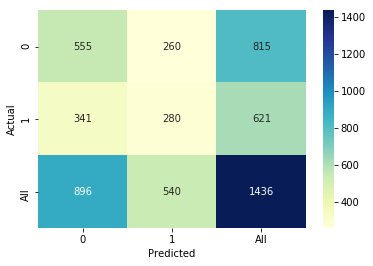

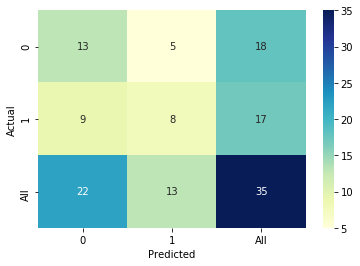

********************************
mlp
best_params:  {'mlpclassifier__hidden_layer_sizes': (50, 50, 5, 10, 5, 200, 200, 10)}
Stride-based model performance (mean):  [0.5984811455941055, 0.5725323550698911, 0.5224321198048184, 0.512867651987705, 0.6399488862129619]
Stride-based model performance (standard deviation):  [0.17023565084204123, 0.1902312566723249, 0.12373535581547937, 0.09799842678602282, 0.18612912646880722]
Person-based model performance (mean):  [0.6, 0.5933333333333334, 0.6499999999999999, 0.5866666666666667, 0.6633333333333333]
Person-based model performance (standard deviation):  [0.20995626366712955, 0.22548712700383683, 0.23804761428476165, 0.184511366707974, 0.2608533006201847]


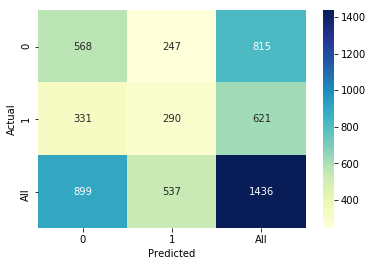

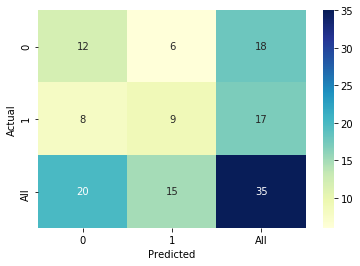

********************************
decision_tree
best_params:  {'decisiontreeclassifier__min_samples_split': 48}
Stride-based model performance (mean):  [0.576451354958486, 0.5142282165913219, 0.5245545041537211, 0.4784920348928014, 0.622858475314129]
Stride-based model performance (standard deviation):  [0.14643463647844163, 0.18244072325467572, 0.177867241628826, 0.11725980900305591, 0.1598682854680514]
Person-based model performance (mean):  [0.6, 0.52, 0.5666666666666667, 0.5171428571428571, 0.6799999999999999]
Person-based model performance (standard deviation):  [0.27701027756664737, 0.41182520563948005, 0.3265986323710904, 0.3562159400116274, 0.2315167380558045]


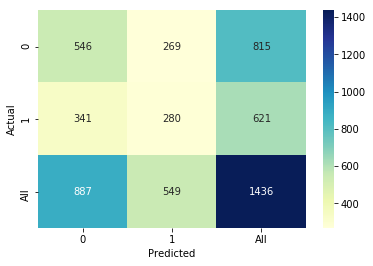

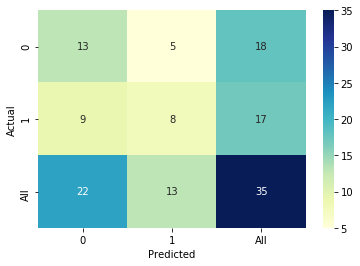

********************************
linear_svm
best_params:  {'linearsvc__loss': 'squared_hinge'}
Stride-based model performance (mean):  [0.5238898972507903, 0.4136112686367629, 0.40876854533907175, 0.3901260140918794, 0.47702818520860235]
Stride-based model performance (standard deviation):  [0.029998000481855247, 0.266793609823037, 0.1584737307923476, 0.20688243813154156, 0.0979593964405579]
Person-based model performance (mean):  [0.5999999999999999, 0.5466666666666666, 0.5599999999999999, 0.54, 0.6333333333333334]
Person-based model performance (standard deviation):  [0.10690449676496977, 0.1528979325490629, 0.1984943324127921, 0.1717879830230017, 0.09888264649460884]


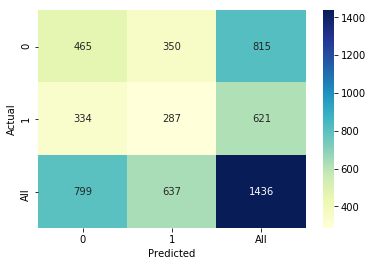

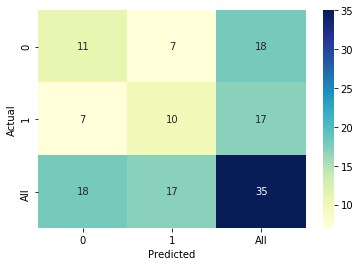

********************************
logistic_regression
best_params:  {'logisticregression__random_state': 0}
Stride-based model performance (mean):  [0.526834005643431, 0.4141257906197695, 0.40920474609490504, 0.3892965403326155, 0.4949706542317355]
Stride-based model performance (standard deviation):  [0.029674633085869352, 0.2632362274136513, 0.16633277191789994, 0.2018834128890635, 0.10305458056200778]
Person-based model performance (mean):  [0.5428571428571428, 0.44666666666666666, 0.45999999999999996, 0.44000000000000006, 0.5933333333333334]
Person-based model performance (standard deviation):  [0.10690449676496977, 0.26964997888208914, 0.3023243291566195, 0.278408173570948, 0.1638427430325934]


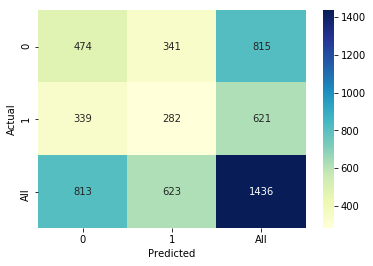

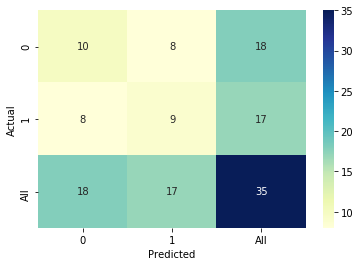

********************************


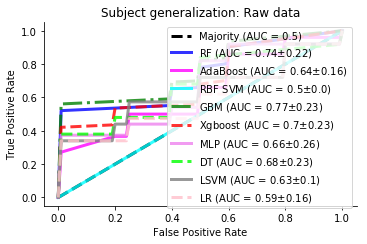

In [4]:
metrics_raw = run_ml_models(ml_models, X_raw, Y_raw, data_type, results_dir)

In [5]:
metrics_raw

,random_forest,adaboost,kernel_svm,gbm,xgboost,mlp,decision_tree,linear_svm,logistic_regression
sequence_mean_accuracy,0.563269,0.534493,0.568039,0.577205,0.583359,0.598481,0.576451,0.523890,0.526834
sequence_mean_precision,0.525797,0.497385,0.000000,0.556884,0.560269,0.572532,0.514228,0.413611,0.414126
sequence_mean_recall,0.534500,0.550170,0.000000,0.535813,0.528219,0.522432,0.524555,0.408769,0.409205
sequence_mean_F1,0.470325,0.471100,0.000000,0.480952,0.486786,0.512868,0.478492,0.390126,0.389297
sequence_mean_AUC,0.619922,0.591937,0.502288,0.652385,0.641846,0.639949,0.622858,0.477028,0.494971
sequence_std_accuracy,0.167739,0.098140,0.222211,0.175943,0.177648,0.170236,0.146435,0.029998,0.029675
sequence_std_precision,0.233641,0.242690,0.000000,0.265133,0.272364,0.190231,0.182441,0.266794,0.263236
sequence_std_recall,0.235870,0.095652,0.000000,0.238946,0.211612,0.123735,0.177867,0.158474,0.166333
sequence_std_F1,0.158685,0.140074,0.000000,0.170810,0.181341,0.097998,0.117260,0.206882,0.201883
sequence_std_AUC,0.198356,0.107714,0.013913,0.205856,0.208304,0.186129,0.159868,0.097959,0.103055


### Traditional ML models for size-N summary features 

In [6]:
data_type = 'sizeN_data'
ml_models = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'mlp', 'decision_tree',  'linear_svm', 
             'logistic_regression']

random_forest
best_params:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 0.1, 'randomforestclassifier__n_estimators': 40}
Stride-based model performance (mean):  [0.6359664901608887, 0.524461030996266, 0.5277446235161294, 0.512695221503061, 0.567465922383466]
Stride-based model performance (standard deviation):  [0.12062263771458041, 0.2631491826019383, 0.22039071908080102, 0.2247035650685103, 0.1514102902477877]
Person-based model performance (mean):  [0.6857142857142857, 0.68, 0.72, 0.6611111111111111, 0.7133333333333334]
Person-based model performance (standard deviation):  [0.16659862556700855, 0.19390719429665315, 0.2803569153775238, 0.18291197370171478, 0.16034684627740925]


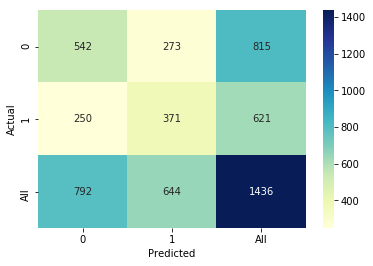

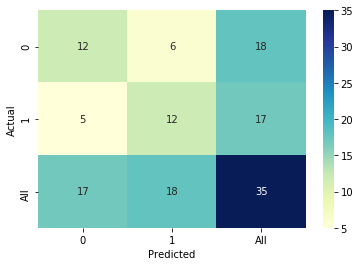

********************************
adaboost
best_params:  {'adaboostclassifier__learning_rate': 0.1, 'adaboostclassifier__n_estimators': 150}
Stride-based model performance (mean):  [0.5572138259173192, 0.4896848859698764, 0.37894823357163204, 0.3856568012110395, 0.528301157982247]
Stride-based model performance (standard deviation):  [0.1317496189852832, 0.23937769448646032, 0.18522283586787566, 0.1572286063457572, 0.15251355829338192]
Person-based model performance (mean):  [0.5428571428571429, 0.4133333333333333, 0.6, 0.4371428571428571, 0.6166666666666666]
Person-based model performance (standard deviation):  [0.1665986255670086, 0.18451136670797397, 0.22607766610417562, 0.13543915302576134, 0.14181364924121762]


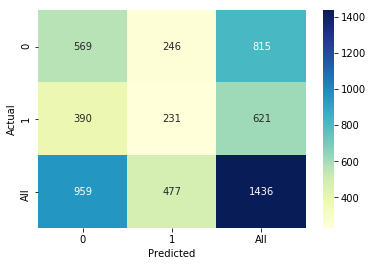

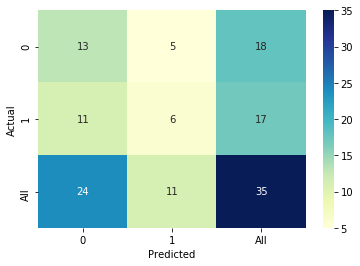

********************************
kernel_svm
best_params:  {'svc__gamma': 10}
Stride-based model performance (mean):  [0.568039160095795, 0.0, 0.0, 0.0, 0.5175364853383669]
Stride-based model performance (standard deviation):  [0.22221119967015965, 0.0, 0.0, 0.0, 0.023349011364026766]
Person-based model performance (mean):  [0.5142857142857142, 0.0, 0.0, 0.0, 0.5]
Person-based model performance (standard deviation):  [0.19378085666072195, 0.0, 0.0, 0.0, 0.0]


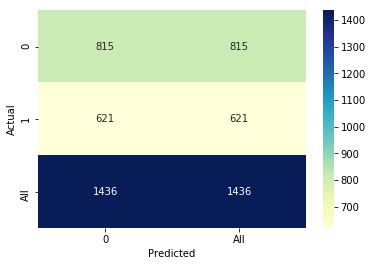

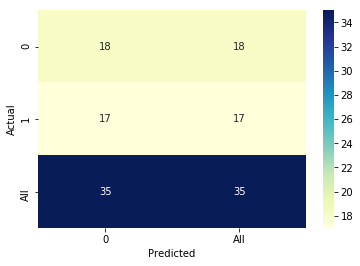

********************************
gbm
best_params:  {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 2, 'gradientboostingclassifier__max_features': 'log2', 'gradientboostingclassifier__min_samples_leaf': 1, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 100}
Stride-based model performance (mean):  [0.567163824359463, 0.48205963647078576, 0.3885472968074391, 0.40036263142254847, 0.5398397007276492]
Stride-based model performance (standard deviation):  [0.10439328659715116, 0.2849798591661264, 0.19191581631046853, 0.2022948092652942, 0.16388937730199943]
Person-based model performance (mean):  [0.5714285714285714, 0.4533333333333333, 0.7166666666666666, 0.4999999999999999, 0.6633333333333333]
Person-based model performance (standard deviation):  [0.18070158058105026, 0.15289793254906286, 0.27688746209726917, 0.14907119849998596, 0.15180396715647598]


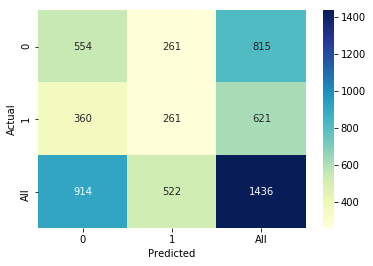

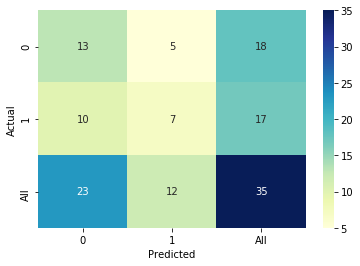

********************************
xgboost
best_params:  {'xgbclassifier__colsample_bytree': 0.6, 'xgbclassifier__gamma': 1, 'xgbclassifier__max_depth': 8, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__subsample': 0.6}
Stride-based model performance (mean):  [0.539697790955542, 0.437037407037407, 0.3779902813893917, 0.37912641228659616, 0.5178951012716233]
Stride-based model performance (standard deviation):  [0.09062479593109, 0.2567447893272449, 0.18836521430842104, 0.18015535956463735, 0.1275855021113569]
Person-based model performance (mean):  [0.5714285714285714, 0.4533333333333333, 0.6, 0.4847619047619047, 0.5599999999999999]
Person-based model performance (standard deviation):  [0.15649215928719032, 0.15289793254906286, 0.22607766610417562, 0.13239122947432488, 0.11575836902790225]


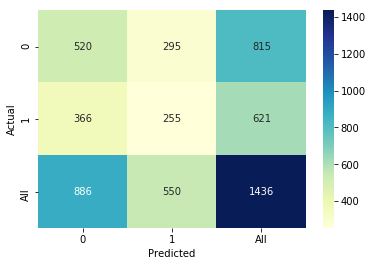

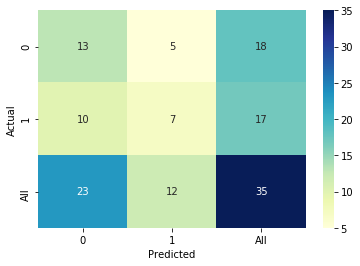

********************************
mlp
best_params:  {'mlpclassifier__hidden_layer_sizes': (5, 5, 5, 5, 10, 10, 30, 50, 10, 10)}
Stride-based model performance (mean):  [0.6118747428906586, 0.4957275420541018, 0.48831190231058114, 0.48102958363169607, 0.5578995657321311]
Stride-based model performance (standard deviation):  [0.08375931101727827, 0.25326003516452356, 0.17000405286419762, 0.20185772070427627, 0.16107740749540042]
Person-based model performance (mean):  [0.7142857142857143, 0.6133333333333334, 0.7499999999999999, 0.6577777777777777, 0.7066666666666667]
Person-based model performance (standard deviation):  [0.12777531299998796, 0.11274356350191843, 0.2472066162365221, 0.15498307354811286, 0.22251092357704846]


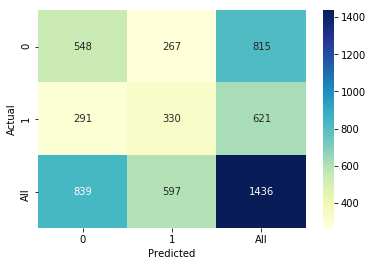

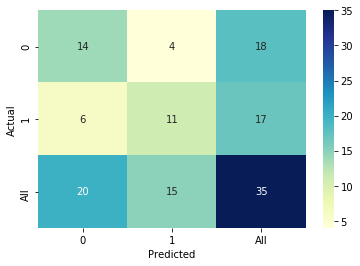

********************************
decision_tree
best_params:  {'decisiontreeclassifier__min_samples_split': 42}
Stride-based model performance (mean):  [0.5104809073499649, 0.4187303990256746, 0.4248969659609531, 0.38169829620897305, 0.4581290016927504]
Stride-based model performance (standard deviation):  [0.05381956538112479, 0.28967154358336267, 0.27479126166373025, 0.22845340098552186, 0.0921489957647911]
Person-based model performance (mean):  [0.5428571428571428, 0.5, 0.5166666666666666, 0.4609523809523809, 0.5633333333333332]
Person-based model performance (standard deviation):  [0.05714285714285714, 0.322490309931942, 0.3431876713662333, 0.2502135142654937, 0.21919042963698132]


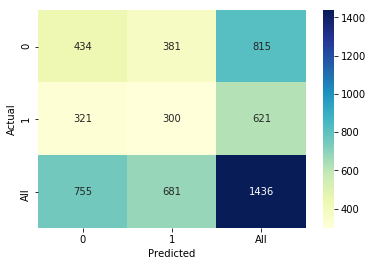

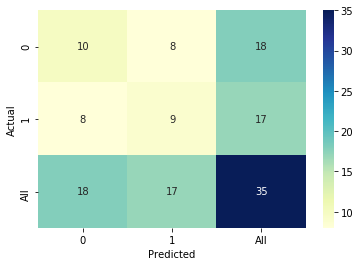

********************************
linear_svm
best_params:  {'linearsvc__loss': 'squared_hinge'}
Stride-based model performance (mean):  [0.5593093025549619, 0.460678257550703, 0.41621290365923763, 0.4129268084620172, 0.5423217334223894]
Stride-based model performance (standard deviation):  [0.05973466931177883, 0.2803372806006305, 0.14868815995653117, 0.19330270553887716, 0.10440303027803081]
Person-based model performance (mean):  [0.6, 0.47333333333333333, 0.5333333333333333, 0.49111111111111105, 0.5933333333333334]
Person-based model performance (standard deviation):  [0.1665986255670086, 0.27357712704910925, 0.33993463423951903, 0.2961814592274869, 0.1756258649642599]


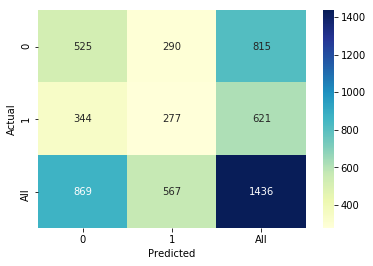

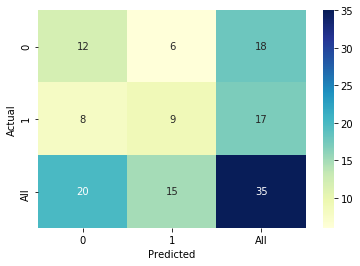

********************************
logistic_regression
best_params:  {'logisticregression__random_state': 0}
Stride-based model performance (mean):  [0.5690549058676384, 0.4620215076278944, 0.4136245428867336, 0.416788219270972, 0.5652977516279508]
Stride-based model performance (standard deviation):  [0.06844958172371236, 0.27927739968218235, 0.16075273415678534, 0.20252937266396964, 0.09131789436681442]
Person-based model performance (mean):  [0.6285714285714286, 0.47333333333333333, 0.5666666666666667, 0.5111111111111111, 0.5933333333333334]
Person-based model performance (standard deviation):  [0.17142857142857143, 0.27357712704910925, 0.3265986323710904, 0.2927097749404331, 0.20698899595013368]


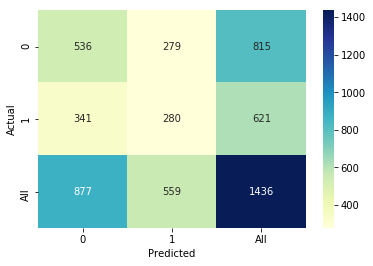

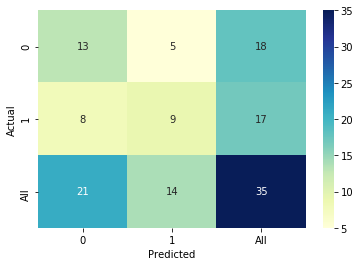

********************************


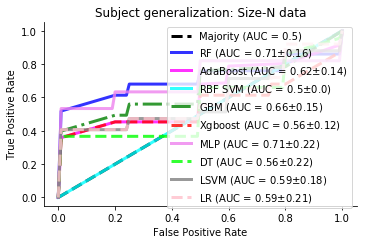

In [7]:
metrics_sizeN = run_ml_models(ml_models, X_sizeN, Y_sizeN, data_type, results_dir)

In [8]:
metrics_sizeN

,random_forest,adaboost,kernel_svm,gbm,xgboost,mlp,decision_tree,linear_svm,logistic_regression
sequence_mean_accuracy,0.635966,0.557214,0.568039,0.567164,0.539698,0.611875,0.510481,0.559309,0.569055
sequence_mean_precision,0.524461,0.489685,0.000000,0.482060,0.437037,0.495728,0.418730,0.460678,0.462022
sequence_mean_recall,0.527745,0.378948,0.000000,0.388547,0.377990,0.488312,0.424897,0.416213,0.413625
sequence_mean_F1,0.512695,0.385657,0.000000,0.400363,0.379126,0.481030,0.381698,0.412927,0.416788
sequence_mean_AUC,0.567466,0.528301,0.517536,0.539840,0.517895,0.557900,0.458129,0.542322,0.565298
sequence_std_accuracy,0.120623,0.131750,0.222211,0.104393,0.090625,0.083759,0.053820,0.059735,0.068450
sequence_std_precision,0.263149,0.239378,0.000000,0.284980,0.256745,0.253260,0.289672,0.280337,0.279277
sequence_std_recall,0.220391,0.185223,0.000000,0.191916,0.188365,0.170004,0.274791,0.148688,0.160753
sequence_std_F1,0.224704,0.157229,0.000000,0.202295,0.180155,0.201858,0.228453,0.193303,0.202529
sequence_std_AUC,0.151410,0.152514,0.023349,0.163889,0.127586,0.161077,0.092149,0.104403,0.091318


### Traditional ML models for regress-N summary features 

In [9]:
data_type = 'regressN_data'
ml_models = ['random_forest', 'adaboost', 'kernel_svm', 'gbm', 'xgboost', 'mlp', 'decision_tree',  'linear_svm', 
             'logistic_regression']

random_forest
best_params:  {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 0.1, 'randomforestclassifier__n_estimators': 40}
Stride-based model performance (mean):  [0.5688930065387279, 0.4696199783525133, 0.4423169951344155, 0.4454086335787011, 0.4527510778603737]
Stride-based model performance (standard deviation):  [0.14052406675790574, 0.29691725692544557, 0.19829940041892982, 0.24943118471167391, 0.20725263740712285]
Person-based model performance (mean):  [0.5428571428571428, 0.44666666666666666, 0.53, 0.44666666666666666, 0.4766666666666667]
Person-based model performance (standard deviation):  [0.13997084244475305, 0.26964997888208914, 0.3627671429443411, 0.2696499788820892, 0.21176506899024788]


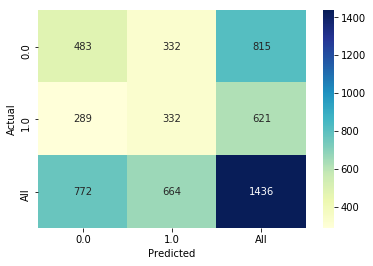

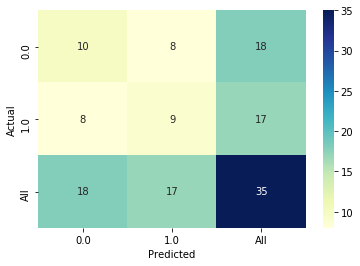

********************************
adaboost
best_params:  {'adaboostclassifier__learning_rate': 1.5, 'adaboostclassifier__n_estimators': 75}
Stride-based model performance (mean):  [0.5714213468424919, 0.49179937253010786, 0.39077103363808974, 0.41619850425683935, 0.4818648614461793]
Stride-based model performance (standard deviation):  [0.09901801220404789, 0.3041720031307734, 0.16565543429955268, 0.222945755709247, 0.1664306913411477]
Person-based model performance (mean):  [0.6285714285714284, 0.47333333333333333, 0.6266666666666667, 0.5142857142857143, 0.5733333333333333]
Person-based model performance (standard deviation):  [0.1456862718169367, 0.27357712704910925, 0.3968766950969924, 0.29802068138069254, 0.19961073228773157]


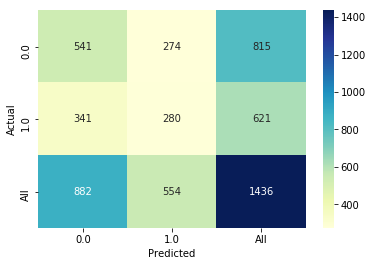

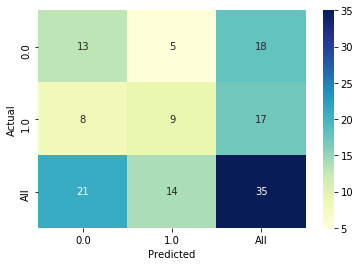

********************************
kernel_svm
best_params:  {'svc__gamma': 10}
Stride-based model performance (mean):  [0.568039160095795, 0.0, 0.0, 0.0, 0.5145982292144871]
Stride-based model performance (standard deviation):  [0.22221119967015965, 0.0, 0.0, 0.0, 0.03878972139697654]
Person-based model performance (mean):  [0.5142857142857142, 0.0, 0.0, 0.0, 0.5]
Person-based model performance (standard deviation):  [0.19378085666072195, 0.0, 0.0, 0.0, 0.0]


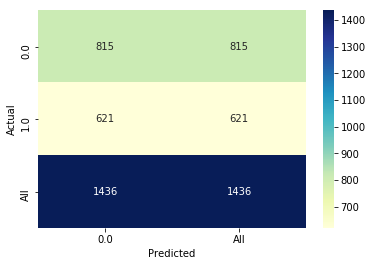

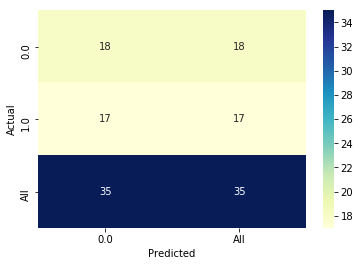

********************************
gbm
best_params:  {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 7, 'gradientboostingclassifier__max_features': 'log2', 'gradientboostingclassifier__min_samples_leaf': 1, 'gradientboostingclassifier__min_samples_split': 4, 'gradientboostingclassifier__n_estimators': 150}
Stride-based model performance (mean):  [0.571220464861949, 0.5320571011410941, 0.36402931440264324, 0.40595322334209333, 0.5484578964680518]
Stride-based model performance (standard deviation):  [0.12618818188386882, 0.3151910296036992, 0.1144736668078743, 0.1840835093999636, 0.18218123903400182]
Person-based model performance (mean):  [0.6, 0.49333333333333335, 0.7, 0.5266666666666666, 0.54]
Person-based model performance (standard deviation):  [0.1665986255670086, 0.15972198067614585, 0.291547594742265, 0.18427033281447003, 0.2130727575266252]


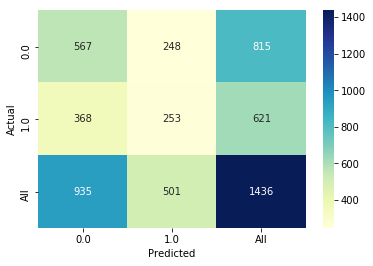

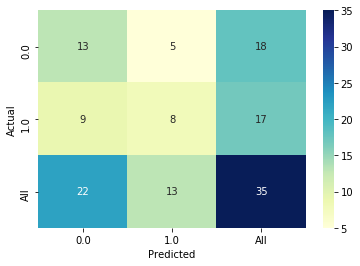

********************************
xgboost
best_params:  {'xgbclassifier__colsample_bytree': 0.6, 'xgbclassifier__gamma': 0.5, 'xgbclassifier__max_depth': 7, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__subsample': 0.6}
Stride-based model performance (mean):  [0.5551918361483265, 0.4767123524309384, 0.3575936181314904, 0.39287923957114756, 0.506996527152811]
Stride-based model performance (standard deviation):  [0.10592680115597135, 0.3160505857312376, 0.13999809086421414, 0.20854215479794655, 0.18211687348260536]
Person-based model performance (mean):  [0.5142857142857142, 0.32666666666666666, 0.6, 0.3942857142857143, 0.5333333333333334]
Person-based model performance (standard deviation):  [0.14568627181693672, 0.1717879830230017, 0.38873012632302006, 0.20456025508192857, 0.21317702607092645]


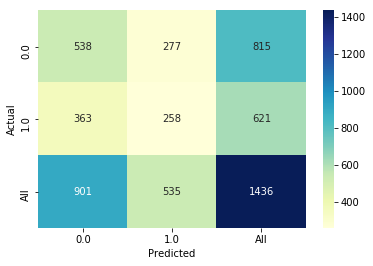

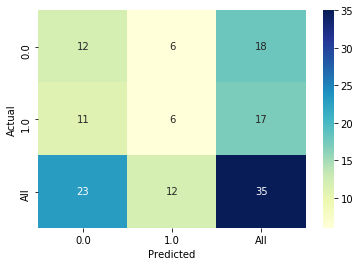

********************************
mlp
best_params:  {'mlpclassifier__hidden_layer_sizes': (42, 5, 42, 84, 7, 120, 84)}
Stride-based model performance (mean):  [0.6336662990218178, 0.5158248229095974, 0.5396183851407425, 0.5138858980875721, 0.6003616784739977]
Stride-based model performance (standard deviation):  [0.10443017232464796, 0.27443194103791807, 0.2140576691527266, 0.24984601292382516, 0.13719378549688863]
Person-based model performance (mean):  [0.657142857142857, 0.58, 0.5599999999999999, 0.56, 0.74]
Person-based model performance (standard deviation):  [0.19378085666072195, 0.33704599092705434, 0.3733630940518894, 0.35427547348230465, 0.1356465996625054]


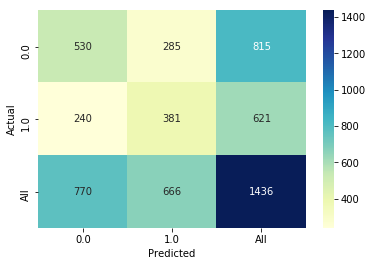

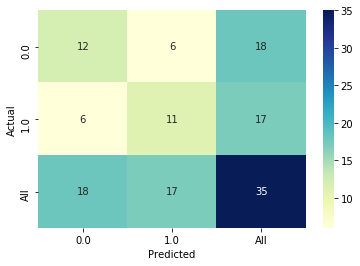

********************************
decision_tree
best_params:  {'decisiontreeclassifier__min_samples_split': 26}
Stride-based model performance (mean):  [0.6416830084388992, 0.5717004875622206, 0.5831998163020211, 0.5497686480714399, 0.5784711671014744]
Stride-based model performance (standard deviation):  [0.11579645274749939, 0.18997138825489782, 0.1419248366435205, 0.13096215767174535, 0.1205274204217025]
Person-based model performance (mean):  [0.7428571428571428, 0.7133333333333333, 0.8095238095238095, 0.720952380952381, 0.7333333333333333]
Person-based model performance (standard deviation):  [0.16659862556700858, 0.24908722256359206, 0.26255330956362327, 0.21076687533139887, 0.21628170930011115]


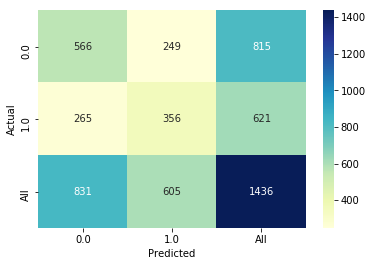

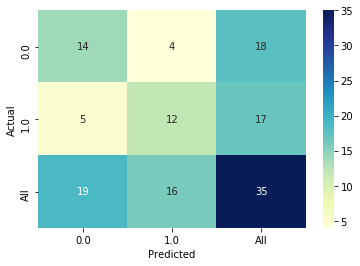

********************************
linear_svm
best_params:  {'linearsvc__loss': 'squared_hinge'}
Stride-based model performance (mean):  [0.6190839705515192, 0.5046784831594934, 0.5075952188816881, 0.47825449182408797, 0.6411456896570085]
Stride-based model performance (standard deviation):  [0.0717667843205202, 0.2877251629556635, 0.21882673700005614, 0.2308596513831262, 0.09402294160119327]
Person-based model performance (mean):  [0.7142857142857142, 0.5533333333333333, 0.6333333333333334, 0.5718181818181818, 0.6599999999999999]
Person-based model performance (standard deviation):  [0.12777531299998796, 0.32359096265364257, 0.4, 0.3328862014870786, 0.2083266665599966]


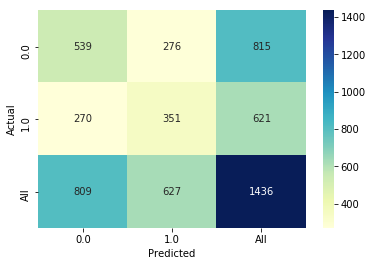

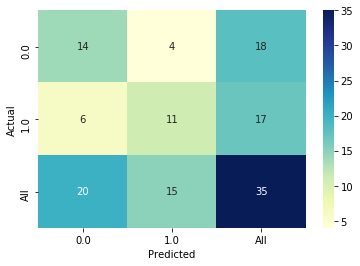

********************************
logistic_regression
best_params:  {'logisticregression__random_state': 0}
Stride-based model performance (mean):  [0.6159733286097486, 0.5167383330224877, 0.5004922931276552, 0.48324622770200454, 0.6326547081825633]
Stride-based model performance (standard deviation):  [0.034472739481530436, 0.26338536168734944, 0.1439199312549062, 0.18623815696041712, 0.06505369379434586]
Person-based model performance (mean):  [0.6857142857142857, 0.5133333333333333, 0.6266666666666667, 0.55, 0.7]
Person-based model performance (standard deviation):  [0.10690449676496976, 0.2745501370929867, 0.3968766950969924, 0.31304951684997057, 0.130384048104053]


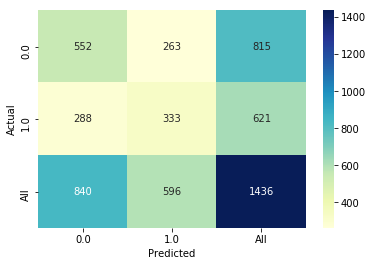

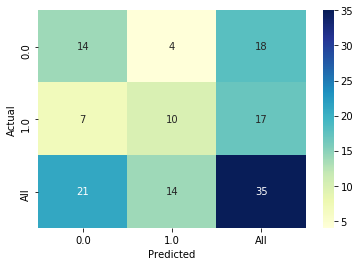

********************************


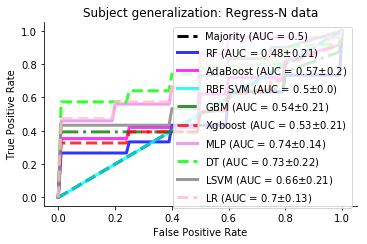

In [10]:
metrics_regressN = run_ml_models(ml_models, X_regressN, Y_regressN, data_type, results_dir)

In [11]:
metrics_regressN

,random_forest,adaboost,kernel_svm,gbm,xgboost,mlp,decision_tree,linear_svm,logistic_regression
sequence_mean_accuracy,0.568893,0.571421,0.568039,0.571220,0.555192,0.633666,0.641683,0.619084,0.615973
sequence_mean_precision,0.469620,0.491799,0.000000,0.532057,0.476712,0.515825,0.571700,0.504678,0.516738
sequence_mean_recall,0.442317,0.390771,0.000000,0.364029,0.357594,0.539618,0.583200,0.507595,0.500492
sequence_mean_F1,0.445409,0.416199,0.000000,0.405953,0.392879,0.513886,0.549769,0.478254,0.483246
sequence_mean_AUC,0.452751,0.481865,0.514598,0.548458,0.506997,0.600362,0.578471,0.641146,0.632655
sequence_std_accuracy,0.140524,0.099018,0.222211,0.126188,0.105927,0.104430,0.115796,0.071767,0.034473
sequence_std_precision,0.296917,0.304172,0.000000,0.315191,0.316051,0.274432,0.189971,0.287725,0.263385
sequence_std_recall,0.198299,0.165655,0.000000,0.114474,0.139998,0.214058,0.141925,0.218827,0.143920
sequence_std_F1,0.249431,0.222946,0.000000,0.184084,0.208542,0.249846,0.130962,0.230860,0.186238
sequence_std_AUC,0.207253,0.166431,0.038790,0.182181,0.182117,0.137194,0.120527,0.094023,0.065054
